In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_UD

In [33]:
df_edge = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [34]:
np.shape(df_edge)

(2219201, 63)

In [35]:
df_edge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [36]:
features_with_one_unique_value = list(df_edge.columns[df_edge.nunique() == 1])
features_with_one_unique_value

['icmp.unused', 'http.tls_port', 'dns.qry.type', 'mqtt.msg_decoded_as']

In [37]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
         "tcp.dstport", "udp.port", "mqtt.msg"]+features_with_one_unique_value
df_edge.drop(drop_columns, axis=1, inplace=True)
df_edge.dropna(axis=0, how='any', inplace=True)
df_edge.drop_duplicates(subset=None, keep="first", inplace=True)
df_edge = shuffle(df_edge)

In [38]:
X = df_edge. drop(['Attack_type','Attack_label'],axis=1)
y_type = df_edge['Attack_type']
y_label = df_edge['Attack_label']

In [39]:
total_attacks = len(df_edge)
attack_type_counts= y_type.value_counts()
attack_label_counts= y_label.value_counts()
percentages_type = (attack_type_counts / total_attacks) * 100
percentages_label = (attack_label_counts / total_attacks) * 100
print(round(percentages_type,2))
print("*********************************")
print(round(percentages_label,2))

Attack_type
Normal                   71.43
DDoS_UDP                  6.37
DDoS_ICMP                 3.56
SQL_injection             2.66
DDoS_TCP                  2.62
Vulnerability_scanner     2.62
Password                  2.61
DDoS_HTTP                 2.54
Uploading                 1.93
Backdoor                  1.26
Port_Scanning             1.05
XSS                       0.79
Ransomware                0.51
Fingerprinting            0.04
MITM                      0.02
Name: count, dtype: float64
*********************************
Attack_label
0    71.43
1    28.57
Name: count, dtype: float64


In [40]:
def unique_values(df, columns):

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [41]:
features = df_edge.columns
unique_values(df_edge, features)

Column: arp.opcode
------------------------------
Unique Values (3): [0. 1. 2.]

Value Counts:
arp.opcode
0.0    1909646
2.0         13
1.0         12
Name: count, dtype: int64

Column: arp.hw.size
------------------------------
Unique Values (2): [0. 6.]

Value Counts:
arp.hw.size
0.0    1909646
6.0         25
Name: count, dtype: int64

Column: icmp.checksum
------------------------------
Unique Values (54645): [    0. 56798. 19595. ... 14706. 42483. 24390.]

Value Counts:
icmp.checksum
0.0        1841154
13516.0          3
2606.0           3
65458.0          3
16077.0          3
            ...   
25413.0          1
33773.0          1
41591.0          1
47148.0          1
43166.0          1
Name: count, Length: 54645, dtype: int64

Column: icmp.seq_le
------------------------------
Unique Values (56328): [    0. 29975.  6611. ... 34423. 45649. 57232.]

Value Counts:
icmp.seq_le
0.0        1830036
256.0          168
18884.0          5
9988.0           5
43174.0          5
            

In [42]:
df_edge.describe().transpose().style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
arp.opcode,1909671.000000,0.000020,0.005789,0.000000,0.000000,0.000000,0.000000,2.000000
arp.hw.size,1909671.000000,0.000079,0.021709,0.000000,0.000000,0.000000,0.000000,6.000000
icmp.checksum,1909671.000000,1175.957547,7069.987438,0.000000,0.000000,0.000000,0.000000,65533.000000
icmp.seq_le,1909671.000000,1363.338938,7575.629581,0.000000,0.000000,0.000000,0.000000,65535.000000
http.content_length,1909671.000000,5.587576,103.922676,0.000000,0.000000,0.000000,0.000000,83655.000000
http.response,1909671.000000,0.017073,0.129542,0.000000,0.000000,0.000000,0.000000,1.000000
tcp.ack,1909671.000000,26472841.739589,177488089.471401,0.000000,1.000000,6.000000,121.000000,3949528703.000000
tcp.ack_raw,1909671.000000,1727409208.950624,1297808988.366625,0.000000,493818884.000000,1707952066.000000,2634509991.000000,4294947151.000000
tcp.checksum,1909671.000000,29466.151504,20478.946765,0.000000,10887.000000,29054.000000,47311.000000,65535.000000
tcp.connection.fin,1909671.000000,0.100920,0.301223,0.000000,0.000000,0.000000,0.000000,1.000000


In [43]:
df_edge.groupby('Attack_label')['udp.stream'].agg(['mean', 'median', 'count'])

,mean,median,count
Attack_label,,,
0,28.699056,0.0,1363998
1,292695.412155,0.0,545673


In [44]:
pd.crosstab(df_edge['Attack_label'],df_edge['arp.opcode'])

arp.opcode,0.0,1.0,2.0
Attack_label,,,
0,1363996,1,1
1,545650,11,12


In [45]:
pd.crosstab(df_edge['Attack_label'],df_edge['arp.hw.size'])

arp.hw.size,0.0,6.0
Attack_label,,
0,1363996,2
1,545650,23


In [46]:
df_edge.groupby('Attack_label')['icmp.checksum'].agg(['mean', 'median', 'count'])

,mean,median,count
Attack_label,,,
0,0.073134,0.0,1363998
1,4115.270996,0.0,545673


<Axes: xlabel='Attack_label', ylabel='icmp.checksum'>

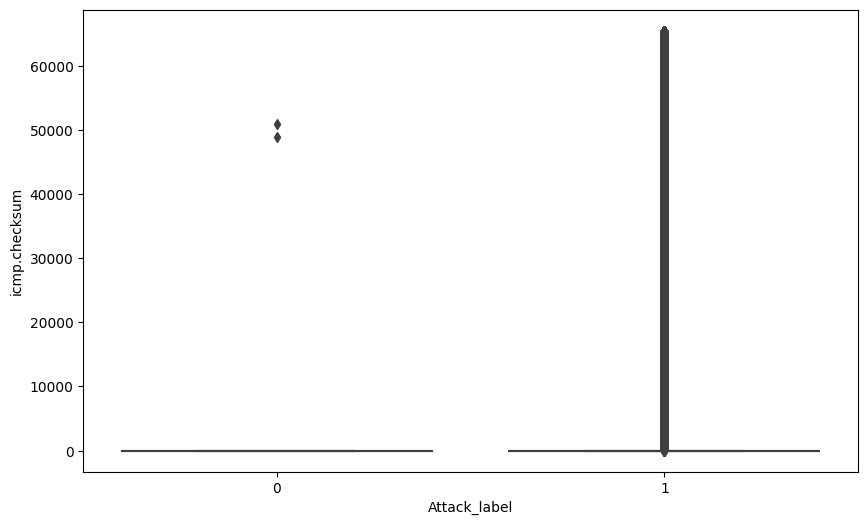

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack_label', y='icmp.checksum', data=df_edge)

In [48]:
df_edge.groupby('Attack_label')['icmp.seq_le'].agg(['mean', 'median', 'count'])

,mean,median,count
Attack_label,,,
0,0.000000,0.0,1363998
1,4771.225318,0.0,545673


In [49]:
unique_values = df_edge['http.content_length'].unique()
sorted_unique_values = sorted(unique_values)
sorted_unique_values

[0.0,
 1.0,
 5.0,
 6.0,
 12.0,
 22.0,
 23.0,
 26.0,
 36.0,
 37.0,
 38.0,
 39.0,
 44.0,
 47.0,
 57.0,
 59.0,
 86.0,
 87.0,
 93.0,
 115.0,
 154.0,
 164.0,
 229.0,
 262.0,
 273.0,
 277.0,
 280.0,
 298.0,
 299.0,
 301.0,
 303.0,
 307.0,
 315.0,
 472.0,
 714.0,
 1153.0,
 1155.0,
 1404.0,
 1406.0,
 1415.0,
 1465.0,
 1824.0,
 83655.0]

/tmp/ipykernel_210/337752632.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df_edge.groupby(['size_category', 'Attack_label']).size().reset_index(name='count')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

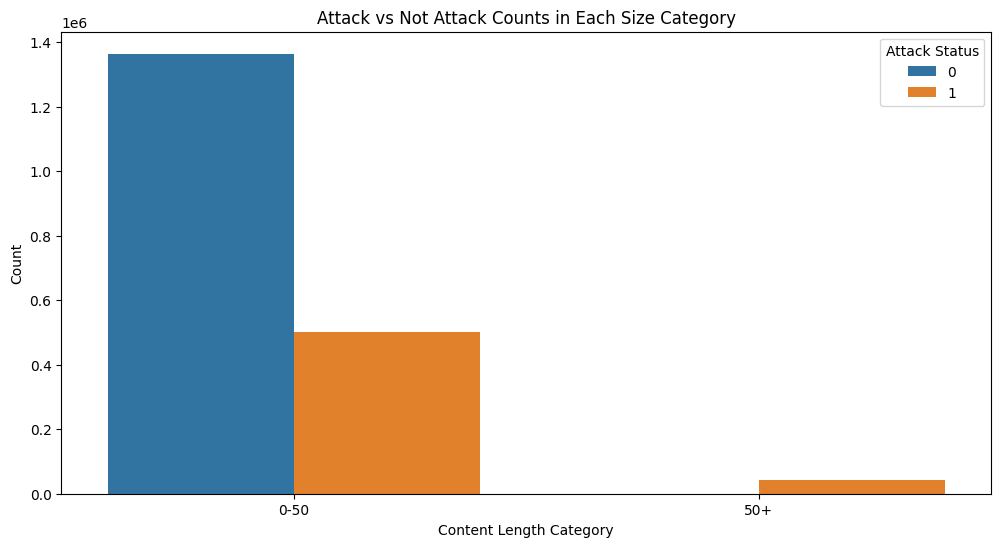

In [50]:
bins = [0, 10, df_edge['http.content_length'].max()]
labels = ['0-50', '50+']
df_edge['size_category'] = pd.cut(df_edge['http.content_length'], bins=bins, labels=labels, right=False)

category_counts = df_edge.groupby(['size_category', 'Attack_label']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='size_category', y='count', hue='Attack_label', data=category_counts)

plt.title('Attack vs Not Attack Counts in Each Size Category')
plt.xlabel('Content Length Category')
plt.ylabel('Count')
plt.legend(title='Attack Status')
plt.show()

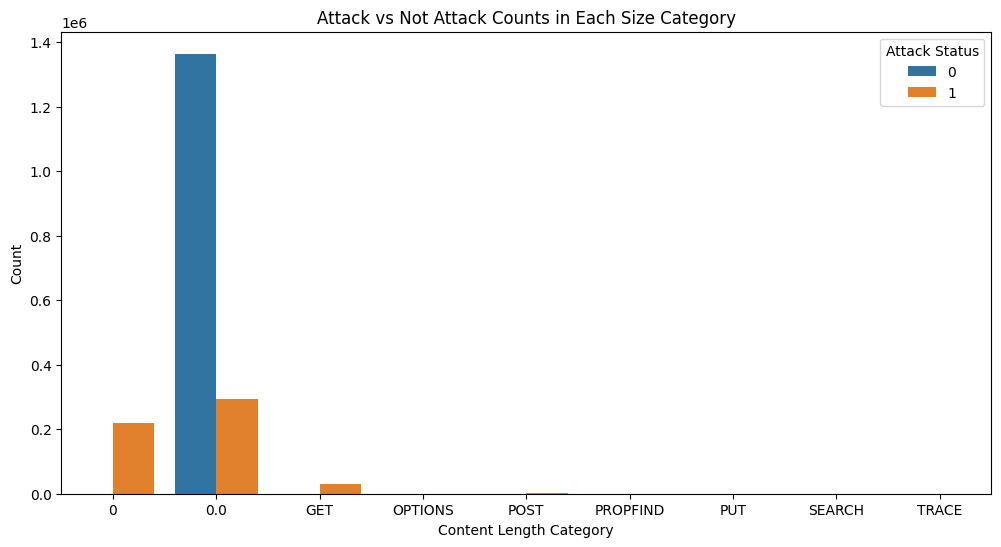

In [51]:
category_counts = df_edge.groupby(['http.request.method', 'Attack_label']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='http.request.method', y='count', hue='Attack_label', data=category_counts)

plt.title('Attack vs Not Attack Counts in Each Size Category')
plt.xlabel('Content Length Category')
plt.ylabel('Count')
plt.legend(title='Attack Status')
plt.show()

In [52]:
pd.crosstab(df_edge['Attack_label'],df_edge['http.response'])

http.response,0.0,1.0
Attack_label,,
0,1363998,0
1,513070,32603


In [53]:
df_edge.groupby('Attack_label')['tcp.ack'].agg(['mean', 'median', 'count'])

,mean,median,count
Attack_label,,,
0,6.239357e+06,15.0,1363998
1,7.704971e+07,1.0,545673


<Axes: xlabel='Attack_label', ylabel='tcp.ack'>

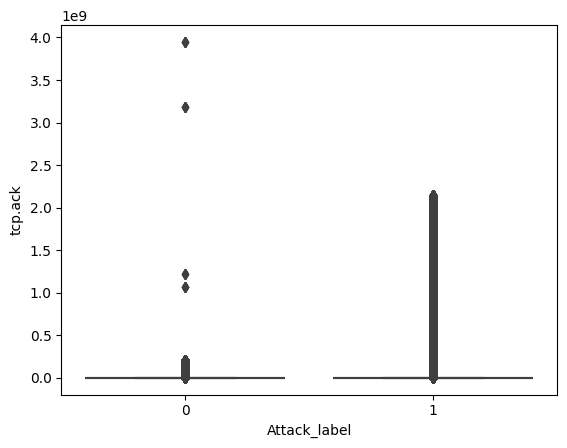

In [54]:
sns.boxplot(x='Attack_label', y='tcp.ack', data=df_edge)

In [55]:
Q1 = df_edge['tcp.ack'].quantile(0.25)
Q3 = df_edge['tcp.ack'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_edge['tcp.ack_no_outliers'] = df_edge['tcp.ack'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

<Axes: xlabel='Attack_label', ylabel='tcp.ack_no_outliers'>

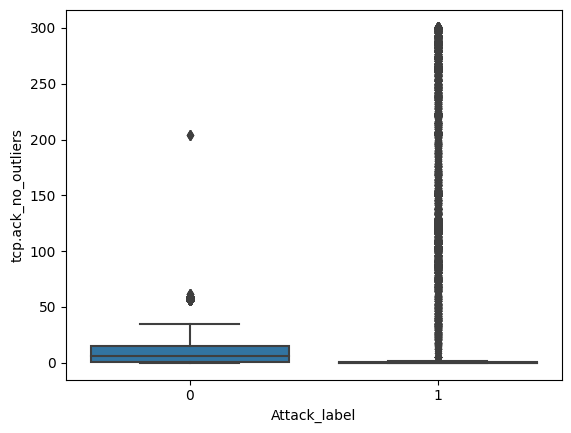

In [56]:
sns.boxplot(x='Attack_label', y='tcp.ack_no_outliers', data=df_edge)